In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config.yaml
with open('../configs/config_karimama.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
0,31/1/1981,98.77,21.75,32.25,59.06,2.50,0.48,NaN,NaN,0.00,NaN,NaN
1,28/2/1981,98.56,26.19,22.19,71.06,2.54,0.44,NaN,NaN,0.00,NaN,NaN
2,31/3/1981,98.44,30.58,27.81,86.50,2.05,0.41,NaN,NaN,5.27,NaN,NaN
3,30/4/1981,98.33,31.62,41.81,201.12,2.60,0.41,NaN,NaN,31.64,NaN,NaN
4,31/5/1981,98.50,29.76,63.81,232.19,2.76,0.44,NaN,NaN,63.28,NaN,NaN


In [5]:
dataset_path

'../datasets/raw/Karimama_with_SPI6.csv'

In [6]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.77,21.75,32.25,59.06,2.50,0.48,NaN,NaN,0.00,NaN,NaN
1981-02-28,98.56,26.19,22.19,71.06,2.54,0.44,NaN,NaN,0.00,NaN,NaN
1981-03-31,98.44,30.58,27.81,86.50,2.05,0.41,NaN,NaN,5.27,NaN,NaN
1981-04-30,98.33,31.62,41.81,201.12,2.60,0.41,NaN,NaN,31.64,NaN,NaN
1981-05-31,98.50,29.76,63.81,232.19,2.76,0.44,NaN,NaN,63.28,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [8]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,98.591789,28.170325,48.801585,150.775407,2.232520,0.461524,48.398377,35.247215,58.105671,20.241623,-2.772138e-16
std,0.158460,2.956628,23.252405,72.695569,0.519713,0.065981,20.170750,2.661185,75.451579,1.587112,1.000000e+00
min,98.100000,20.890000,11.120000,20.690000,1.240000,0.400000,5.240000,30.230000,0.000000,15.650000,-1.374085e+00
25%,98.490000,26.300000,26.390000,70.862500,1.787500,0.410000,29.790000,33.455000,0.000000,19.197500,-9.812924e-01
50%,98.620000,27.475000,48.155000,193.655000,2.305000,0.430000,53.590000,36.680000,15.820000,20.345000,-3.039787e-02
75%,98.700000,30.370000,71.265000,217.560000,2.632500,0.500000,65.235000,37.357500,110.740000,21.362500,8.378613e-01
max,99.100000,35.060000,84.810000,346.500000,3.540000,0.730000,81.950000,37.880000,290.040000,24.480000,2.450270e+00


In [9]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset

In [11]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.77,21.75,32.25,59.06,2.50,0.48,NaN,NaN,0.00,NaN,NaN
1981-02-28,98.56,26.19,22.19,71.06,2.54,0.44,NaN,NaN,0.00,NaN,NaN
1981-03-31,98.44,30.58,27.81,86.50,2.05,0.41,NaN,NaN,5.27,NaN,NaN
1981-04-30,98.33,31.62,41.81,201.12,2.60,0.41,NaN,NaN,31.64,NaN,NaN
1981-05-31,98.50,29.76,63.81,232.19,2.76,0.44,NaN,NaN,63.28,NaN,NaN
1981-06-30,98.65,29.24,66.88,220.25,2.53,0.48,NaN,NaN,226.76,NaN,-0.092414
1981-07-31,98.71,26.22,80.50,228.06,2.12,0.59,NaN,NaN,226.76,NaN,0.796504


In [12]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


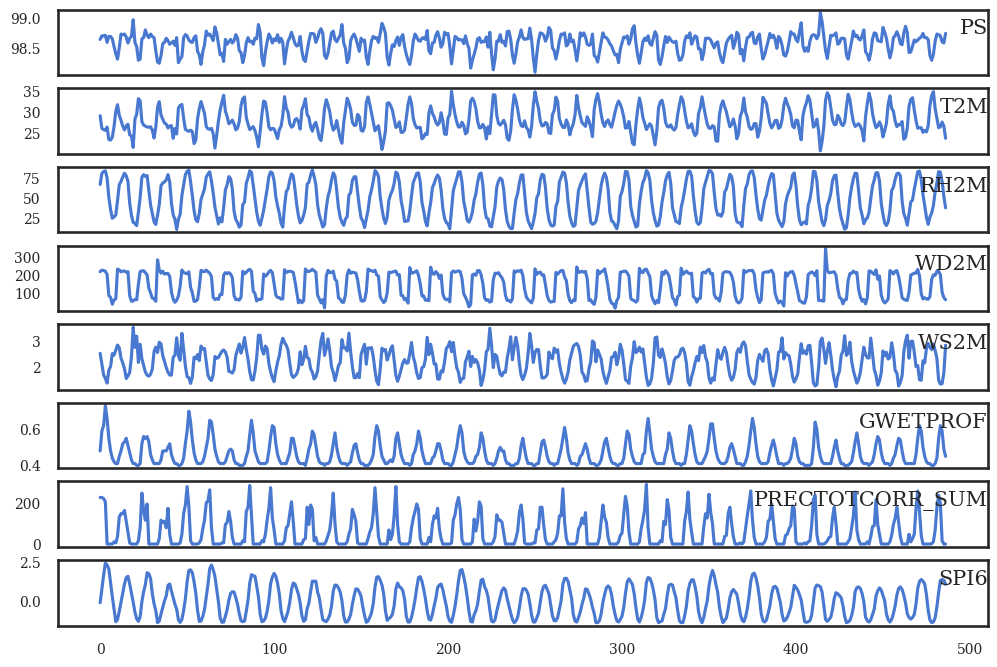

In [14]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [15]:
target_column = 'SPI6'

In [16]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.10,0.178546,0.513367,0.225008,0.121739,-0.515152,0.563646,-0.092414
1981-07-31,0.22,-0.247706,0.883023,0.272950,-0.234783,0.151515,0.563646,0.796504
1981-08-31,0.22,-0.287227,0.944090,0.261840,-0.600000,0.333333,0.527238,1.664724
1981-09-30,0.24,-0.311221,0.967703,0.236119,-0.721739,1.000000,0.418149,2.450270
1981-10-31,0.00,-0.203952,0.730493,0.127958,-0.878261,0.575758,-1.000000,2.326238


### Pearson Correlation

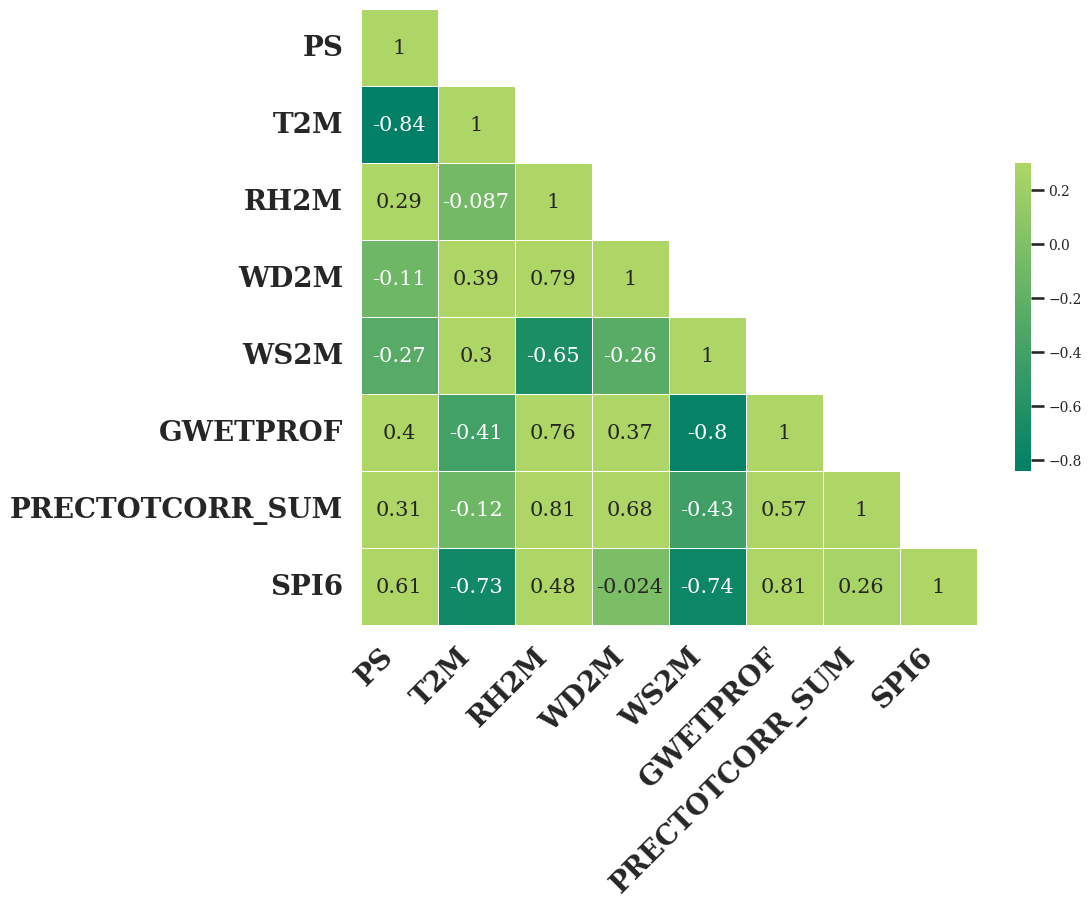

In [17]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('heatmap correlation Pix1')

#### Let's focus on the corelations between each variable and target variable

In [18]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.810595
PS                 0.605573
RH2M               0.477435
PRECTOTCORR_SUM    0.261795
WD2M              -0.024283
T2M               -0.731253
WS2M              -0.741390
Name: SPI6, dtype: float64

In [19]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.810595
WS2M               0.741390
T2M                0.731253
PS                 0.605573
RH2M               0.477435
PRECTOTCORR_SUM    0.261795
WD2M               0.024283
Name: SPI6, dtype: float64

In [20]:
#Removal of WD2M covariate as it has the a non relevant correlation coef 
normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

,PS,T2M,RH2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,
1981-06-30,0.10,0.178546,0.513367,0.121739,-0.515152,0.563646,-0.092414
1981-07-31,0.22,-0.247706,0.883023,-0.234783,0.151515,0.563646,0.796504
1981-08-31,0.22,-0.287227,0.944090,-0.600000,0.333333,0.527238,1.664724
1981-09-30,0.24,-0.311221,0.967703,-0.721739,1.000000,0.418149,2.450270
1981-10-31,0.00,-0.203952,0.730493,-0.878261,0.575758,-1.000000,2.326238


In [21]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [25]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

In [26]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [27]:
lagged_selected_columns = ['SPI6(t)']

In [28]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),RH2M(t-4),...,GWETPROF(t-1),PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.10,0.178546,0.513367,0.121739,-0.515152,0.563646,-0.092414,0.22,-0.247706,0.883023,...,0.575758,-1.000000,2.326238,0.20,-0.621736,0.080744,-0.443478,-0.090909,-1.000000,2.078176
1981-12-31,0.22,-0.247706,0.883023,-0.234783,0.151515,0.563646,0.796504,0.22,-0.287227,0.944090,...,-0.090909,-1.000000,2.078176,0.20,-0.637262,-0.333152,-0.321739,-0.515152,-1.000000,1.189258
1982-01-31,0.22,-0.287227,0.944090,-0.600000,0.333333,0.527238,1.664724,0.24,-0.311221,0.967703,...,-0.515152,-1.000000,1.189258,0.12,-0.544107,-0.624915,0.113043,-0.757576,-1.000000,0.300340
1982-02-28,0.24,-0.311221,0.967703,-0.721739,1.000000,0.418149,2.450270,0.00,-0.203952,0.730493,...,-0.757576,-1.000000,0.300340,-0.14,-0.188426,-0.579319,0.060870,-0.878788,-0.927251,-0.526524
1982-03-31,0.00,-0.203952,0.730493,-0.878261,0.575758,-1.000000,2.326238,0.20,-0.621736,0.080744,...,-0.878788,-0.927251,-0.526524,-0.38,0.329570,-0.514724,0.234783,-0.939394,-0.963660,-1.312069


### Now we have 42 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [29]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6'], dtype='object')

In [30]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

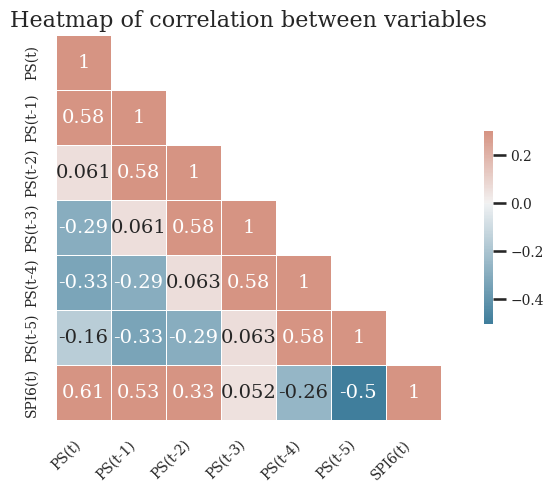

In [31]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [32]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t)      0.608108
PS(t-1)    0.532621
PS(t-5)    0.501339
PS(t-2)    0.332905
PS(t-4)    0.255574
PS(t-3)    0.051903
Name: SPI6(t), dtype: float64

#####  The lag 0 : PS(t) is the most correlated. So, we only keep it.

In [33]:
lagged_selected_columns.append('PS(t)')

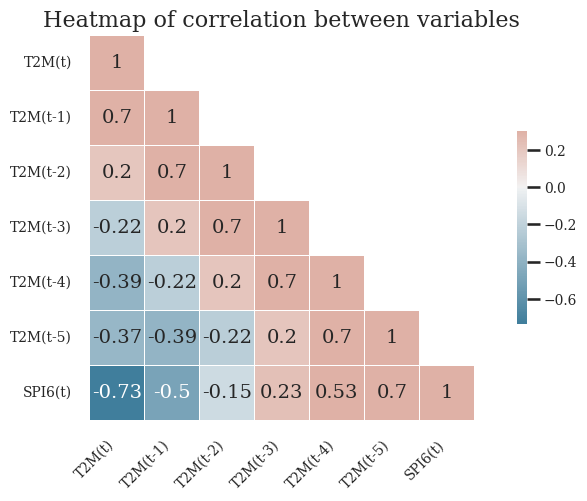

In [34]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [35]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.733603
T2M(t-5)    0.697546
T2M(t-4)    0.531012
T2M(t-1)    0.499170
T2M(t-3)    0.228112
T2M(t-2)    0.145816
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.73

In [36]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t)']


(None, None)

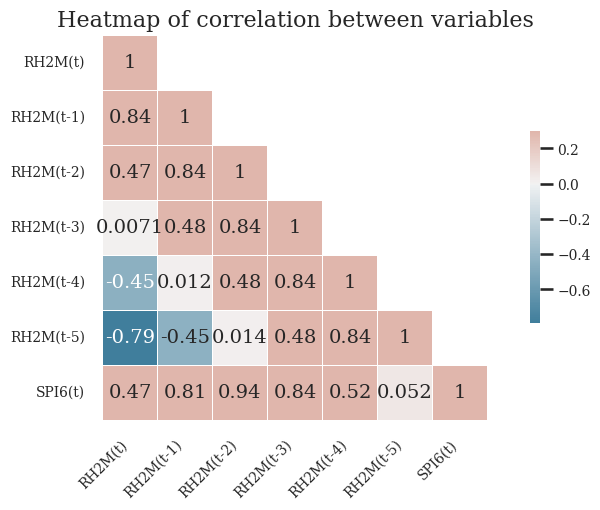

In [37]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [38]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.943576
RH2M(t-3)    0.840526
RH2M(t-1)    0.810574
RH2M(t-4)    0.517317
RH2M(t)      0.468458
RH2M(t-5)    0.051564
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.94

In [39]:
lagged_selected_columns.append('RH2M(t-2)')

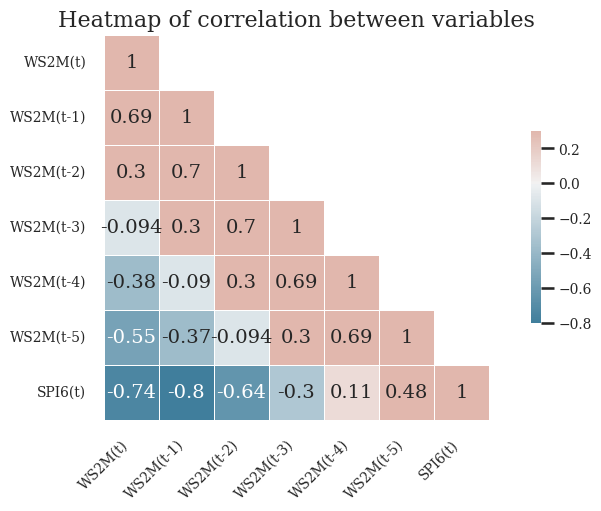

In [40]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [41]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.802281
WS2M(t)      0.738813
WS2M(t-2)    0.640113
WS2M(t-5)    0.483573
WS2M(t-3)    0.297795
WS2M(t-4)    0.113644
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.80

In [42]:
lagged_selected_columns.append('WS2M(t-1)')

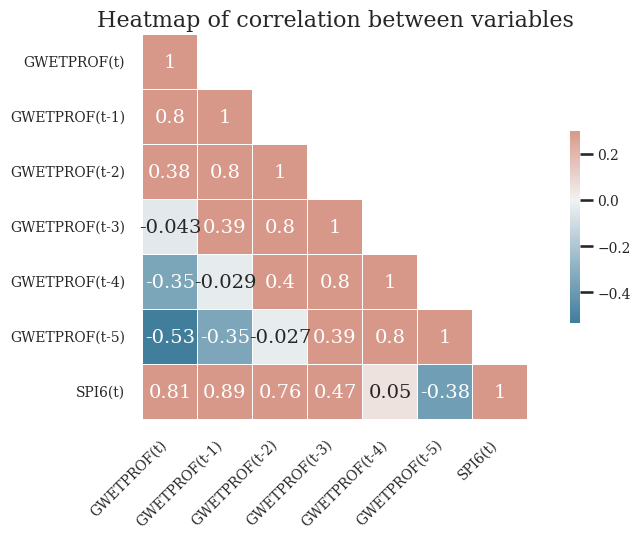

In [43]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [44]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t-1)    0.891814
GWETPROF(t)      0.805924
GWETPROF(t-2)    0.763334
GWETPROF(t-3)    0.465379
GWETPROF(t-5)    0.384362
GWETPROF(t-4)    0.050494
Name: SPI6(t), dtype: float64

le lag 1 est le plus correlé : GWETPROF(t-1)      0.89

In [45]:
lagged_selected_columns.append('GWETPROF(t-1)')

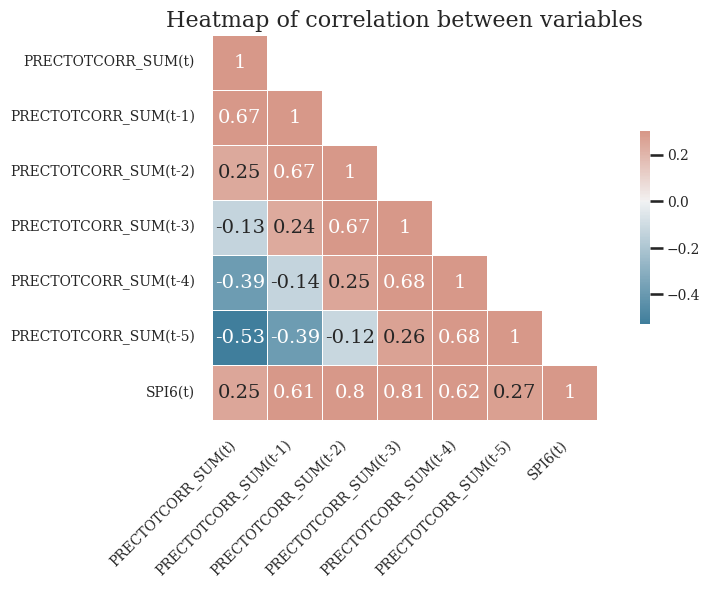

In [46]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.808122
PRECTOTCORR_SUM(t-2)    0.804163
PRECTOTCORR_SUM(t-4)    0.621721
PRECTOTCORR_SUM(t-1)    0.607125
PRECTOTCORR_SUM(t-5)    0.271839
PRECTOTCORR_SUM(t)      0.253726
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.80

In [48]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

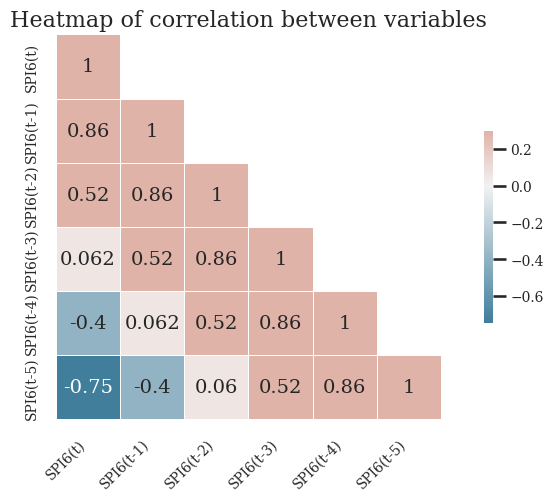

In [49]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [50]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.863023
SPI6(t-5)    0.748534
SPI6(t-2)    0.518161
SPI6(t-4)    0.397905
SPI6(t-3)    0.061724
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.86

In [51]:
lagged_selected_columns.append('SPI6(t-1)')

New dataset by choosing each  new lag

In [52]:
#lagged_selected_columns, 
len(lagged_selected_columns)

8

In [53]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t-1)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)']


In [54]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t-1),PRECTOTCORR_SUM(t-3),SPI6(t-1)
DATE,,,,,,,,
1981-11-30,2.078176,0.20,-0.621736,0.967703,-0.878261,0.575758,0.527238,2.326238
1981-12-31,1.189258,0.20,-0.637262,0.730493,-0.443478,-0.090909,0.418149,2.078176
1982-01-31,0.300340,0.12,-0.544107,0.080744,-0.321739,-0.515152,-1.000000,1.189258
1982-02-28,-0.526524,-0.14,-0.188426,-0.333152,0.113043,-0.757576,-1.000000,0.300340
1982-03-31,-1.312069,-0.38,0.329570,-0.624915,0.060870,-0.878788,-1.000000,-0.526524
...,...,...,...,...,...,...,...,...
2021-08-31,0.560751,0.26,-0.225124,0.267200,-0.052174,-0.757576,-0.922011,-0.367172
2021-09-30,1.336065,0.22,-0.189838,0.565748,-0.773913,-0.090909,-0.533857,0.560751
2021-10-31,1.392631,0.02,-0.034580,0.944090,-0.913043,0.333333,0.216522,1.336065


In [55]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged.csv'
final_lagged_data.to_csv(lagged_data_path)

In [57]:
pd.read_csv('../datasets/lagged/Karimama_lagged.csv')

,DATE,SPI6(t),PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t-1),PRECTOTCORR_SUM(t-3),SPI6(t-1)
0,1981-11-30,2.078176,0.20,-0.621736,0.967703,-0.878261,0.575758,0.527238,2.326238
1,1981-12-31,1.189258,0.20,-0.637262,0.730493,-0.443478,-0.090909,0.418149,2.078176
2,1982-01-31,0.300340,0.12,-0.544107,0.080744,-0.321739,-0.515152,-1.000000,1.189258
3,1982-02-28,-0.526524,-0.14,-0.188426,-0.333152,0.113043,-0.757576,-1.000000,0.300340
4,1982-03-31,-1.312069,-0.38,0.329570,-0.624915,0.060870,-0.878788,-1.000000,-0.526524
...,...,...,...,...,...,...,...,...,...
477,2021-08-31,0.560751,0.26,-0.225124,0.267200,-0.052174,-0.757576,-0.922011,-0.367172
478,2021-09-30,1.336065,0.22,-0.189838,0.565748,-0.773913,-0.090909,-0.533857,0.560751
479,2021-10-31,1.392631,0.02,-0.034580,0.944090,-0.913043,0.333333,0.216522,1.336065
480,2021-11-30,1.348334,-0.02,-0.171489,0.922106,-0.895652,0.151515,0.632258,1.392631
